# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [374]:
##Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [375]:
os.chdir("E:\PGP AIML\Labs\Residency 3\Internal\R3_Internal_PGPAIML_ML_Hyd_Apr'19") 
os.getcwd()
students = pd.read_csv("students-data.csv", sep=';')

In [376]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [377]:
students.shape

(395, 33)

# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [378]:
students.index.name = 'number'

In [379]:
students.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395,NaN,NaN,NaN,16.6962,1.27604,15,16,17,18,22
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395,NaN,NaN,NaN,2.74937,1.09474,0,2,3,4,4
Fedu,395,NaN,NaN,NaN,2.52152,1.0882,0,2,2,3,4
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [380]:
students.isnull().sum()

#No missing values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [381]:
(students.select_dtypes(exclude ='int64')).columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [382]:
students.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [385]:
students = students.drop(['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc'], axis=1)

In [386]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [387]:
categorical_feature_mask = students.dtypes==object
categorical_cols = students.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
students[categorical_cols] = students[categorical_cols].apply(lambda col: le.fit_transform(col))

In [388]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [389]:
students["G1"] = students["G1"].map(lambda
         x: 1 if (x >= 10)
         else 0)

In [390]:
students["G2"] = students["G2"].map(lambda
         x: 1 if (x >= 10)
         else 0)

In [391]:
students["G3"] = students["G3"].map(lambda
         x: 1 if (x >= 10)
         else 0)

In [392]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [393]:
Y = students['G3']
Y.shape

(395,)

In [394]:
X = students.loc[:, students.columns != 'G3']
X.shape

(395, 26)

# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [395]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=95, random_state=100)

In [396]:
print(len(X_train),len(X_test))

300 95


# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [397]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, Y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [398]:
Train_pred=logisticRegr.predict(X_train)
Test_pred=logisticRegr.predict(X_test)

In [399]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, Train_pred)

0.9366666666666666

In [400]:
accuracy_score(Y_test, Test_pred)

0.8947368421052632

# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [401]:
logisticRegr.intercept_

array([0.31848739])

# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [402]:
logisticRegr.coef_

array([[ 0.08540261, -0.34296139, -0.15159724,  0.09919353, -0.21588797,
        -0.64096548,  0.10961306, -0.22033122, -0.01740633,  0.40003183,
         0.14973969,  0.34834026, -0.46258881, -0.46047445, -0.06305721,
        -0.05421572, -0.40452051,  0.86445991, -0.05989737, -0.47511425,
        -0.32233514,  0.5884173 , -0.13163221, -0.03418576,  1.46368583,
         4.13494054]])

In [403]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logisticRegr.coef_))], axis = 1)
coefficients

,0,0
0,school,0.085403
1,sex,-0.342961
2,age,-0.151597
3,address,0.099194
4,famsize,-0.215888
5,Pstatus,-0.640965
6,Medu,0.109613
7,Fedu,-0.220331
8,Mjob,-0.017406
9,Fjob,0.400032


In [404]:
# G2 column has the highest impact on dependent variable by looking at the coefficient.

# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [405]:
Train_pred=logisticRegr.predict(X_train)
Test_pred=logisticRegr.predict(X_test)

In [406]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, Train_pred)

0.9366666666666666

In [407]:
accuracy_score(Y_test, Test_pred)

0.8947368421052632

# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [434]:
bc = pd.read_csv("bc2.csv")

In [435]:
bc.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [436]:
bc.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [437]:
bc.columns = bc.columns.str.replace(' ', '_')

In [438]:
bc.columns

Index(['ID', 'ClumpThickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Normal_Nucleoli',
       'Bland_Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [439]:
bc.head()

,ID,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [440]:
len(bc)

699

In [441]:
bc.dtypes

ID                              int64
ClumpThickness                  int64
Cell_Size                       int64
Cell_Shape                      int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Normal_Nucleoli                 int64
Bland_Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [442]:
bc.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell_Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell_Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal_Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single_Epithelial_Cell_Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare_Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal_Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland_Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


### Check Missing Values

In [443]:
bc.isnull().sum()

#No missing values

ID                             0
ClumpThickness                 0
Cell_Size                      0
Cell_Shape                     0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Normal_Nucleoli                0
Bland_Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [444]:
len(bc[(bc['Bare_Nuclei'] == '?')])

#16 rows with ? in Bare Nuclei column

16

In [445]:
bc['Bare_Nuclei'] = np.where(bc['Bare_Nuclei'] == '?',1,bc['Bare_Nuclei'])

In [446]:
len(bc[(bc['Bare_Nuclei'] == '?')])

0

### Print and plot the distribution of target variable (Class - using Histogram) 

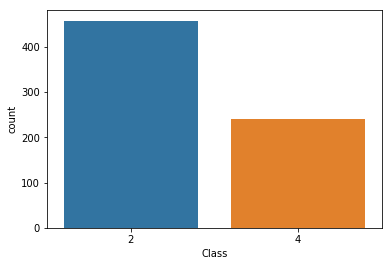

In [447]:
import seaborn as sns

sns.countplot(bc['Class'])

### convert the datatype of Bare Nuclei to `int`

In [448]:
bc['Bare_Nuclei'] = bc['Bare_Nuclei'].astype(str).astype(int)

In [449]:
bc.dtypes

ID                             int64
ClumpThickness                 int64
Cell_Size                      int64
Cell_Shape                     int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int32
Normal_Nucleoli                int64
Bland_Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

### Standardization of Data (Use Standard Scaler)

In [450]:
X = bc.loc[:, bc.columns != 'Class']
X.shape

(699, 10)

In [451]:
Y = bc['Class']
Y.shape

(699,)

In [452]:
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(X.values)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [453]:
Sclaed_X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

In [454]:
Sclaed_X.head()

,ID,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912


### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

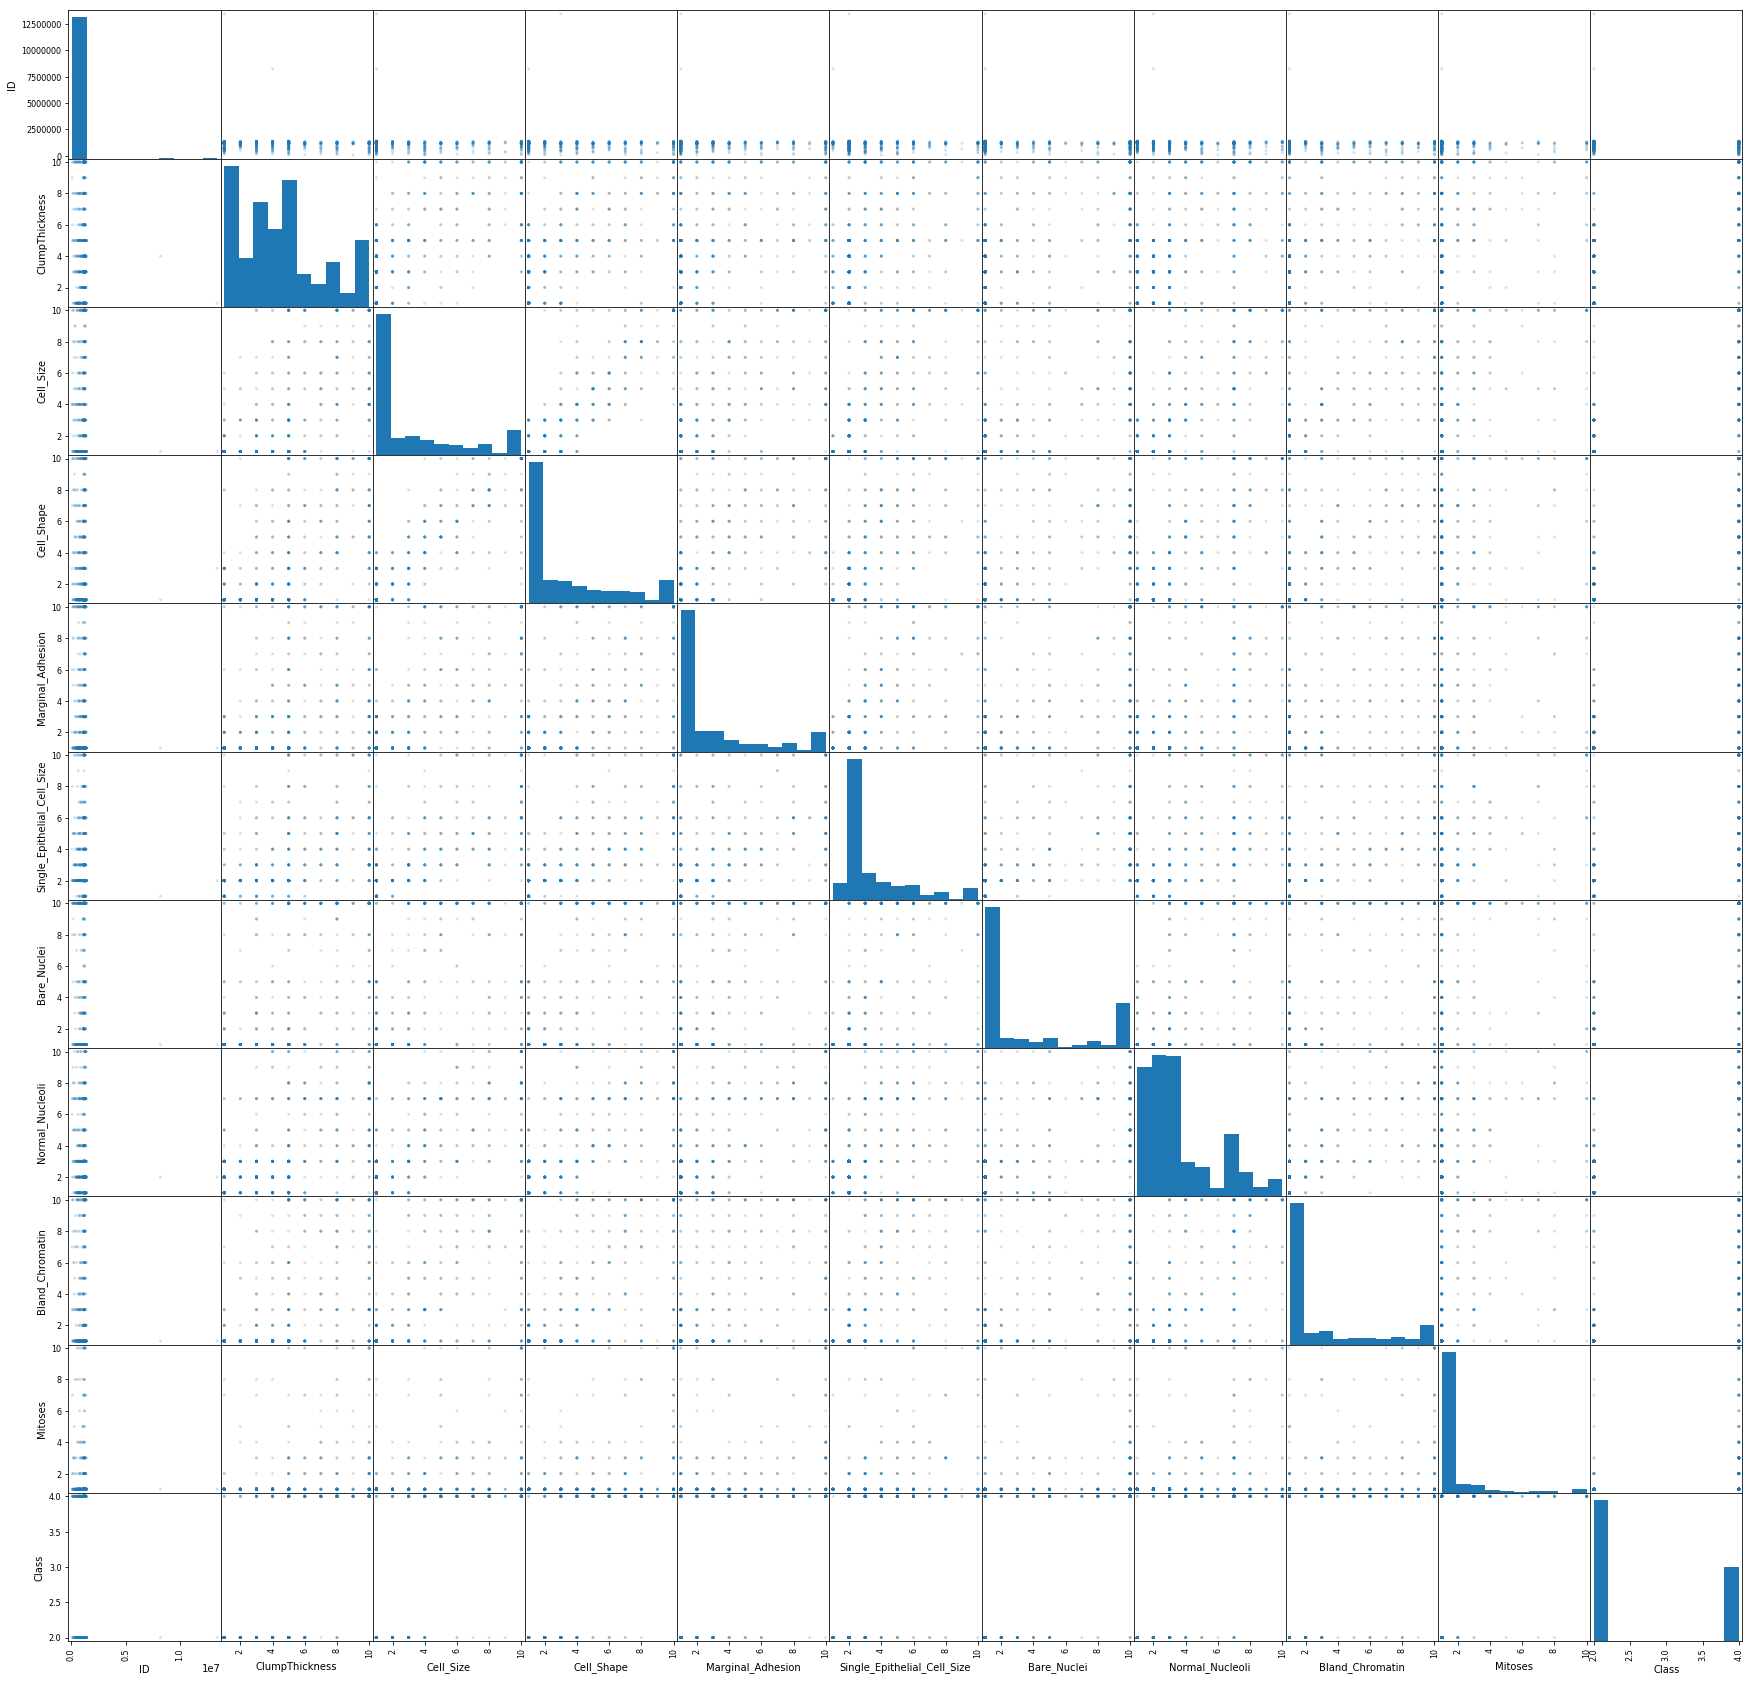

In [455]:
from pandas.plotting import scatter_matrix

scatter_matrix(bc, alpha=0.2,figsize=[30,30])

plt.show()

In [456]:
bc.corr()

,ID,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal_Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland_Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [457]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""Class ~ ClumpThickness + Cell_Size + Cell_Shape + Marginal_Adhesion + Single_Epithelial_Cell_Size + Bare_Nuclei + Normal_Nucleoli + Bland_Chromatin + Mitoses""",bc)
vif

,Variable,VIF
0,Intercept,5.1
1,ClumpThickness,1.9
2,Cell_Size,7.2
3,Cell_Shape,6.5
4,Marginal_Adhesion,2.5
5,Single_Epithelial_Cell_Size,2.5
6,Bare_Nuclei,2.5
7,Normal_Nucleoli,2.9
8,Bland_Chromatin,2.4
9,Mitoses,1.4


In [458]:
#dropping columns which have VIF > 5. Starting with Cell_Size, will check again after dropping it.

bc = bc.drop(['Cell_Size'], axis=1)

In [459]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""Class ~ ClumpThickness + Cell_Shape + Marginal_Adhesion + Single_Epithelial_Cell_Size + Bare_Nuclei + Normal_Nucleoli + Bland_Chromatin + Mitoses""",bc)
vif

,Variable,VIF
0,Intercept,4.8
1,ClumpThickness,1.9
2,Cell_Shape,4.0
3,Marginal_Adhesion,2.4
4,Single_Epithelial_Cell_Size,2.4
5,Bare_Nuclei,2.5
6,Normal_Nucleoli,2.8
7,Bland_Chromatin,2.4
8,Mitoses,1.4


### Divide the dataset into feature set and target set

In [460]:
#Already divided in the above step to perform standard scaler only on independent variables.

### Divide the Training and Test sets in 70:30 

In [461]:
X = X.loc[:, X.columns != 'ID']

#Removing ID because it is not required for the model

In [462]:
X = X.loc[:, X.columns != 'Cell_Size']

#Removing Cell Size again because X has VIF > 5

In [463]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

### Model 1 : Implement a default Decision Tree model with no attributes

In [464]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy')

In [465]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [466]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                  Imp
ClumpThickness               0.004261
Cell_Shape                   0.690406
Marginal_Adhesion            0.010661
Single_Epithelial_Cell_Size  0.006152
Bare_Nuclei                  0.090599
Normal_Nucleoli              0.025681
Bland_Chromatin              0.149522
Mitoses                      0.022717


### Check the training & test accuracy of model 1 

In [467]:
print(dt_model.score(X_train , Y_train))
print(dt_model.score(X_test , Y_test))

# 91% accuracy for test data set
# 100% accuracy for test data set

1.0
0.9238095238095239


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [468]:
dt_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, max_leaf_nodes=5)

In [469]:
dt_model2.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [470]:
print(dt_model2.score(X_train , Y_train))
print(dt_model2.score(X_test , Y_test))

# 96.7% accuracy for test data set
# 90.95% accuracy for test data set

0.967280163599182
0.9095238095238095


### Print the confusion matrix of model 1 and model 2

In [471]:
y_predict_model1 = dt_model.predict(X_test)

In [472]:
y_predict_model2 = dt_model2.predict(X_test)

In [473]:
from sklearn import metrics

print(metrics.confusion_matrix(Y_test, y_predict_model1))

[[120   9]
 [  7  74]]


In [474]:
print(metrics.confusion_matrix(Y_test, y_predict_model2))

[[118  11]
 [  8  73]]
